In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('/Users/sivamaichi/Desktop/Datasets/CSV Files/diabetes.csv')
print(df.head())
#print (df.shape)

/Users/sivamaichi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
#statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

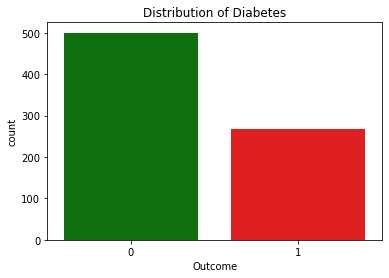

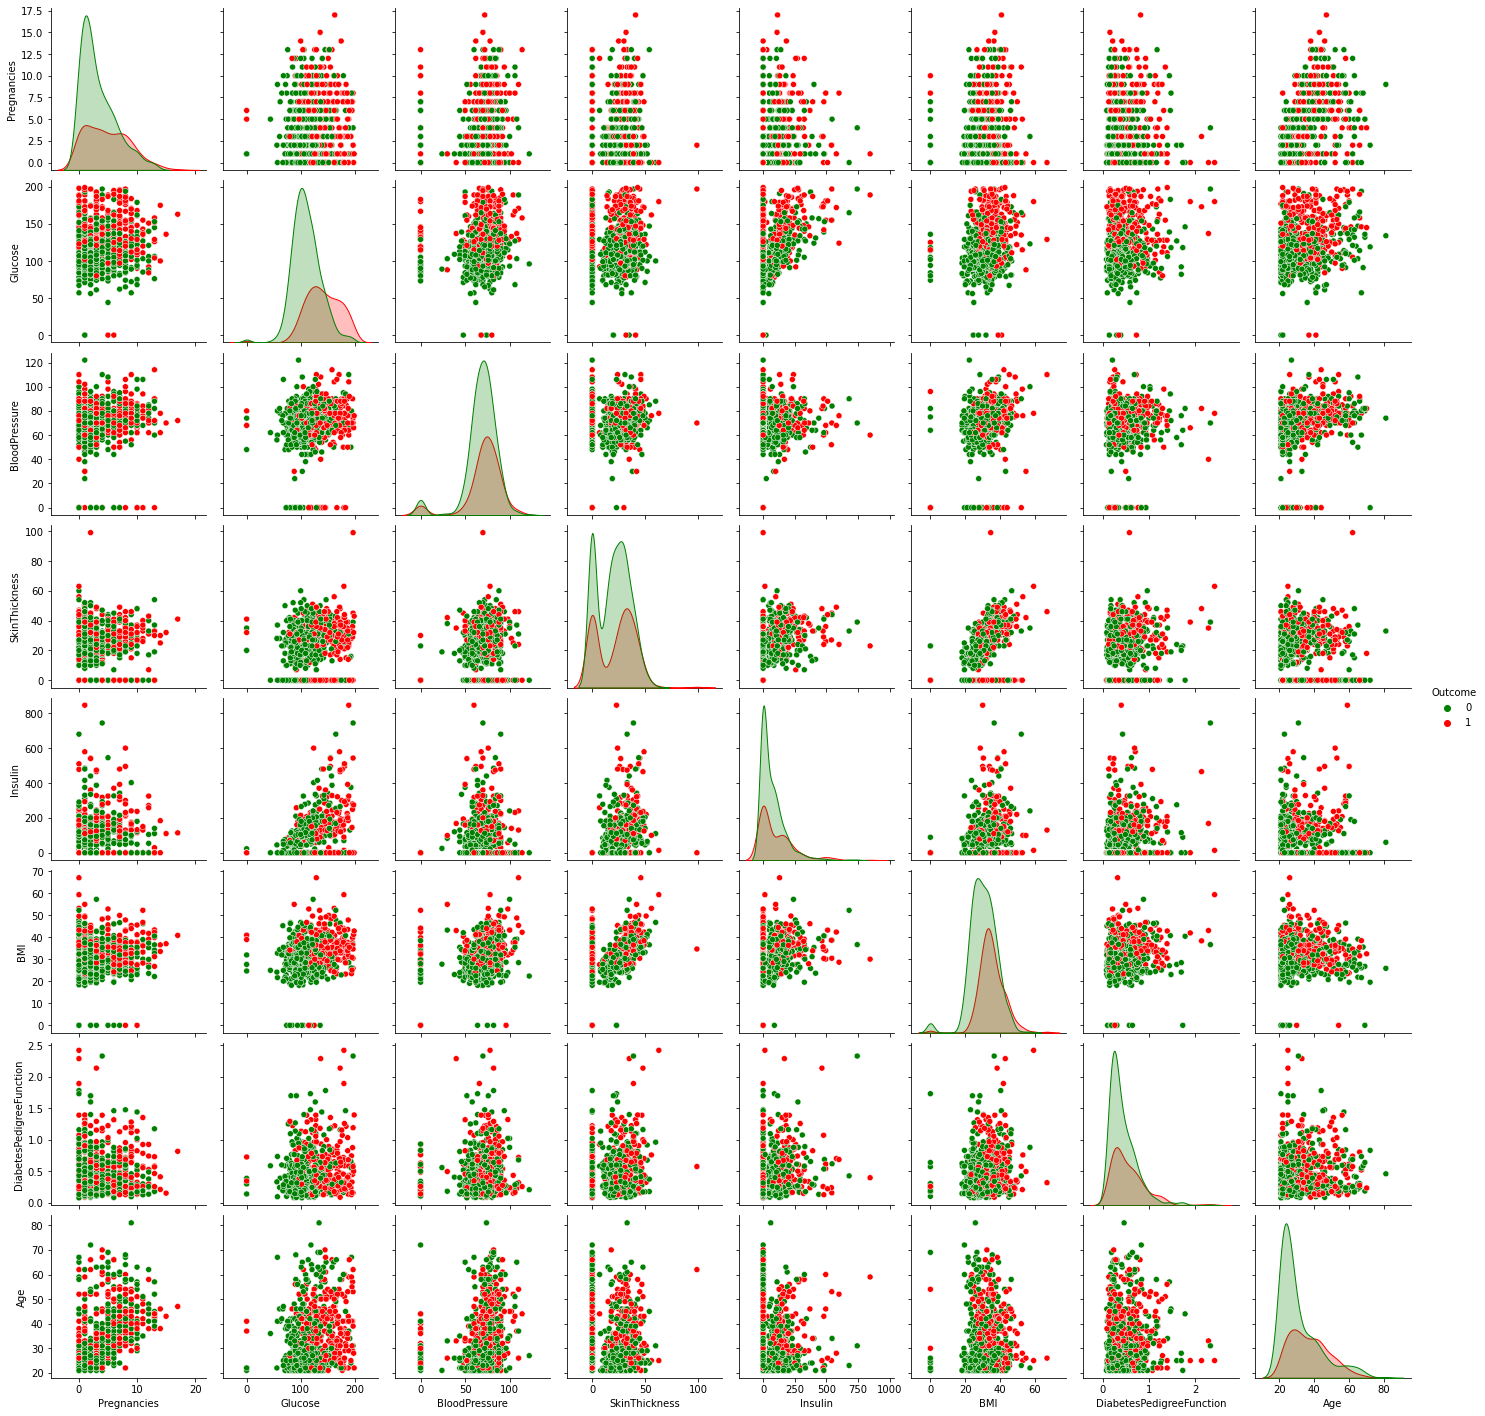

In [3]:
sns.set_palette(["green", "red"])
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes')
plt.show()
sns.pairplot(df, hue='Outcome', palette={0: 'green', 1: 'red'})
plt.show()

In [4]:
#checking for null values and dividing train and test values (80,20)
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
print("X_train:")
print(X_train[:5])  
print("\nX_test:")
print(X_test[:5])  
print("\ny_train:")
print(y_train[:5])
print("\ny_test:")
print(y_test[:5])  

X_train:
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]

X_test:
[[ 0.68185612 -0.71402038 -0.61712658  0.81710976  0.93474906  0.26073561
  -0.11637247  0.87809089]
 [-0.52639686 -0.27664283  0.30191569  0.7522648  -0.70120553  0.48053518
  -0.954231   -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 -1.32277365 -0.70120553 -0.15300476
  -0.9245197  -1.03594038]
 [ 1.28598261 -0.43284909  0.57222224 -1.32277365 -0.70120553 -0.95462672
   1.14932872  0.0950781 ]
 [ 0.98391937  0.47314726  1.11283533 -1.32277365 -0.70120553 -0.2693692

In [6]:
#model training and testing
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = [accuracy, precision, recall, f1]

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

           Logistic Regression  Decision Tree  K-Nearest Neighbors  \
Accuracy              0.753247       0.746753             0.694805   
Precision             0.649123       0.625000             0.583333   
Recall                0.672727       0.727273             0.509091   
F1 Score              0.660714       0.672269             0.543689   

           Support Vector Machine  Random Forest  Gradient Boosting  
Accuracy                 0.733766       0.720779           0.740260  
Precision                0.645833       0.607143           0.627119  
Recall                   0.563636       0.618182           0.672727  
F1 Score                 0.601942       0.612613           0.649123  


Logistic Regression provides high accuracy and precision. The Decision Tree and Gradient Boosting models are better at identifying positive cases.

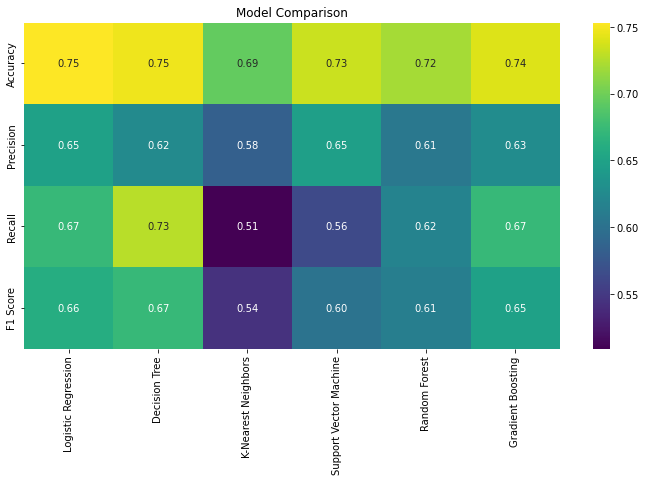

In [7]:
#model comparison heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('Model Comparison')
plt.show()

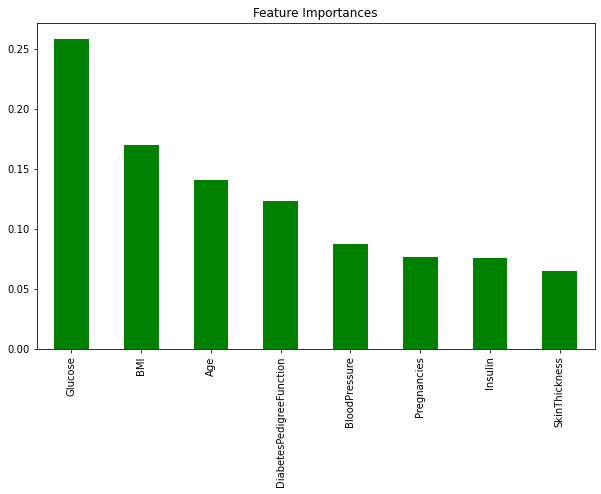

In [8]:
#training a RandomForest model to get feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

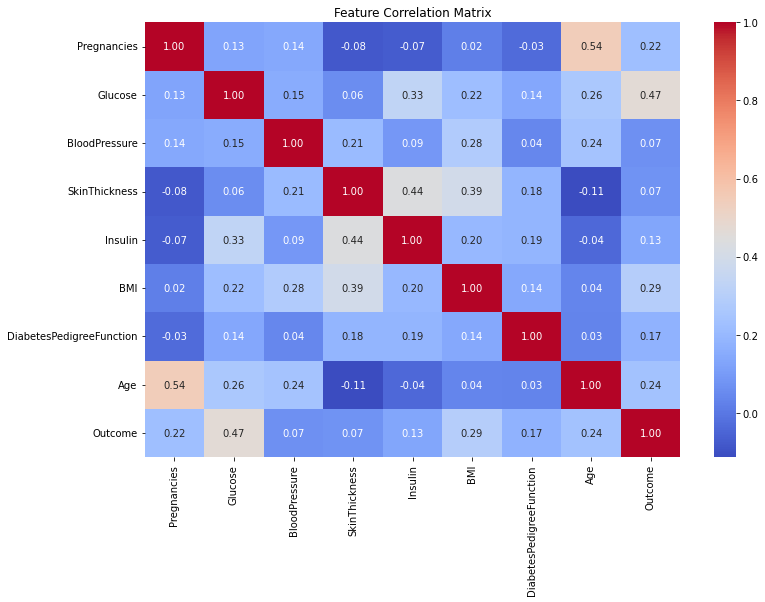

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [9]:
#correlation matrix of features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
print(correlation_with_target)

Glucose has the strongest positive correlation with Outcome and it suggests that it is a significant predictor of diabetes.
BMI and skin thickness also have notable positive correlations with Outcome.